Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Importing the dataset

In [3]:
df = pd.read_csv('diamonds.csv')

In [4]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


The summary statistics of the numeric variables

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Exploring the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The data types

In [7]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

The shape of the data

In [8]:
df.shape

(53940, 11)

Dropping the 'Unnamed' column.

In [9]:
df =df.drop('Unnamed: 0', axis = 1)

Removing Outliers

In [12]:
df.drop(df.query('z>10 or y>10').index, inplace=True)

In [13]:
df.drop(df.query('x==0 or y==0 or z==0').index, inplace=True)

Creating a new column, called 'volume'

In [14]:
df['volume'] = df['x'] * df['y'] * df['z']

Dropping the x, y, z columns

In [16]:
df.drop(['x','y','z'], axis=1, inplace=True)

Encoding categorical data using OrdinalEncoder

In [18]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [19]:
#Category ordering for the cut column
cut_order = ['Fair','Good','Very Good', 'Premium', 'Ideal']

In [20]:
from sklearn.preprocessing import OrdinalEncoder

#define ordinal encoding
enc = OrdinalEncoder(categories=[cut_order])

#fit_transform data
df['cut']= enc.fit_transform(df[['cut']])

In [22]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [23]:
#Category ordering for the color column
color_order =['D','E','F','G','H','I','J']

In [24]:
#define ordinal encoding
enc = OrdinalEncoder(categories=[color_order])

#fit_transform data
df['color']= enc.fit_transform(df[['color']])


In [26]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [27]:
# Categorical Oredering for the clarity column
clarity_order = ['SI2', 'SI1','VS1','VS2', 'VVS2','VVS1','I1', 'IF']

In [28]:
#define ordinal encoding
enc = OrdinalEncoder(categories=[clarity_order])

#fit_transform data
df['clarity']= enc.fit_transform(df[['clarity']])


In [81]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4.0,1.0,0.0,61.5,55.0,326,38.202030
1,0.21,3.0,1.0,1.0,59.8,61.0,326,34.505856
2,0.23,1.0,1.0,2.0,56.9,65.0,327,38.076885
3,0.29,3.0,5.0,3.0,62.4,58.0,334,46.724580
4,0.31,1.0,6.0,0.0,63.3,58.0,335,51.917250


Calculating the total value of the diamonds

In [30]:
suM = df.price.sum()
print('Total $ Value of Diamonds : ${:0.2f}'.format(suM))

Total $ Value of Diamonds : $211891128.00


Calculate the mean price of the diamonds 


In [31]:
meaN = df.price.mean()
print('Mean $ Value of Diamonds : ${:0.2f}'.format(meaN))


Mean $ Value of Diamonds : $3930.17


Counting the number of each clarity type

c:\Users\vasil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


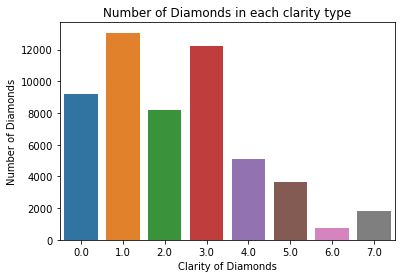

In [62]:
sns.countplot(df['clarity'])

plt.title('Number of Diamonds in each clarity type')
plt.xlabel('Clarity of Diamonds')
plt.ylabel('Number of Diamonds')
plt.show()

Count the number of each textual type of color

In [36]:
colorindex1 = df['color'].value_counts().index.tolist()
print(colorindex1)
colorcount = df['color'].value_counts().values.tolist()
print(colorcount)


[3.0, 1.0, 2.0, 4.0, 0.0, 5.0, 6.0]
[11284, 9795, 9538, 8297, 6774, 5420, 2806]


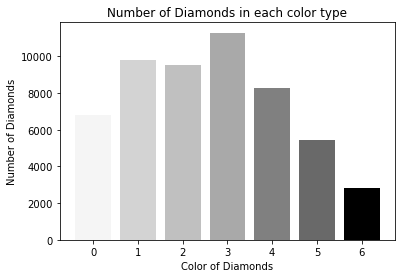

In [60]:
plt.bar(colorindex1,colorcount,color=('darkgrey', 'lightgrey', 'silver','gray','whitesmoke','dimgrey','black'))
plt.title('Number of Diamonds in each color type')
plt.xlabel('Color of Diamonds')
plt.ylabel('Number of Diamonds')
plt.show()

Heat plots to find correlations

C:\Users\vasil\AppData\Local\Temp\ipykernel_16312\3659746949.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df.corr(), mask =np.zeros_like(corr_matrix, dtype=np.bool),


<AxesSubplot:>

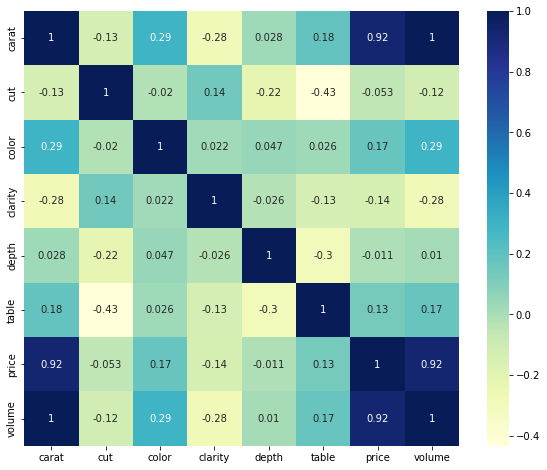

In [79]:
f, ax =plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), mask =np.zeros_like(corr_matrix, dtype=np.bool), 
 cmap = "YlGnBu",
 square =True, ax = ax, annot=True)

The darker the color, the higher the correlationbetween the two variables. As carat and volume increase, so does price. 

Scatterplot of carat and price of the Diamond

<AxesSubplot:xlabel='carat', ylabel='price'>

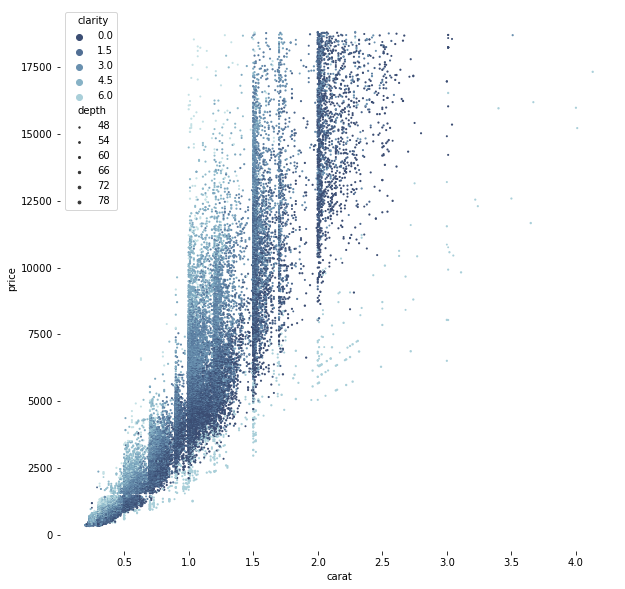

In [75]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="carat", y="price", hue='clarity',
                 size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

Distribution of the price

Text(0.5, 1.0, 'Distribution of the price')

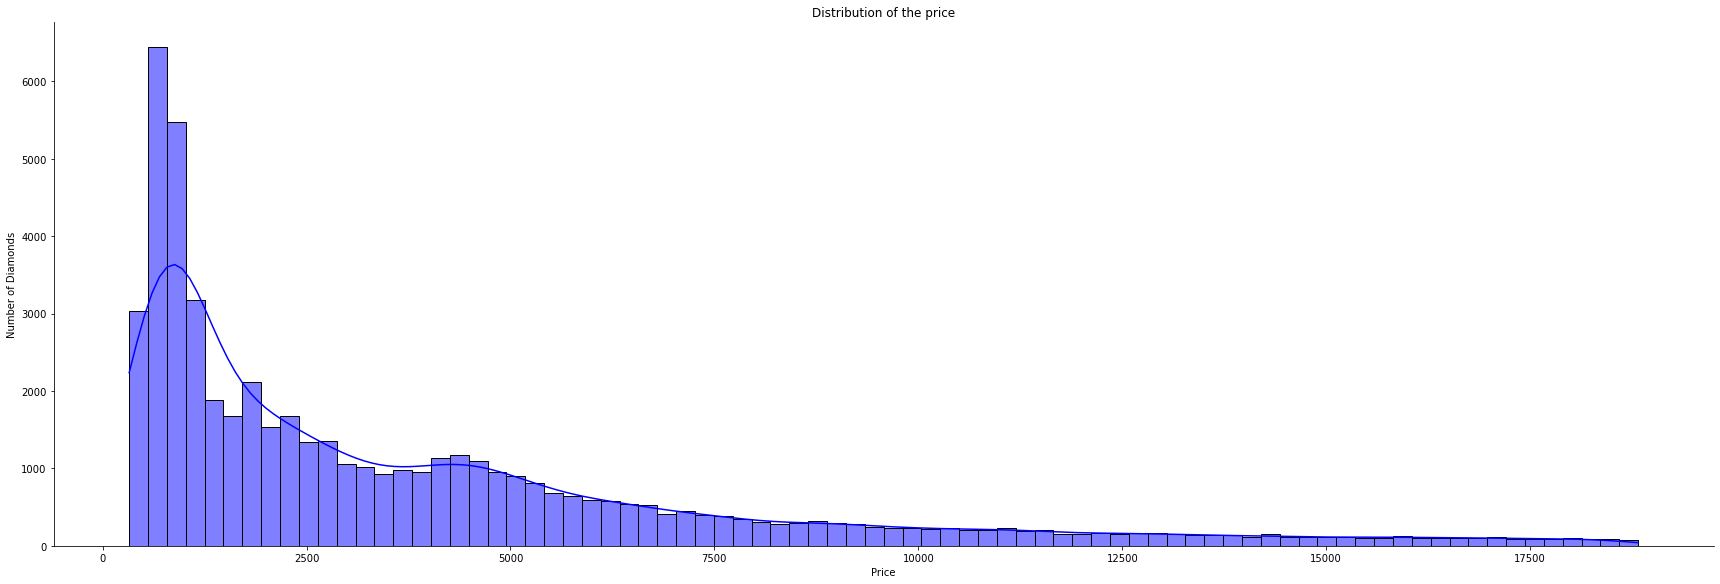

In [76]:

sns.displot(data = df['price'],kde =True, alpha=0.5,height=8,aspect=3,color='blue')

plt.xlabel('Price')
plt.ylabel('Number of Diamonds')
plt.title('Distribution of the price')


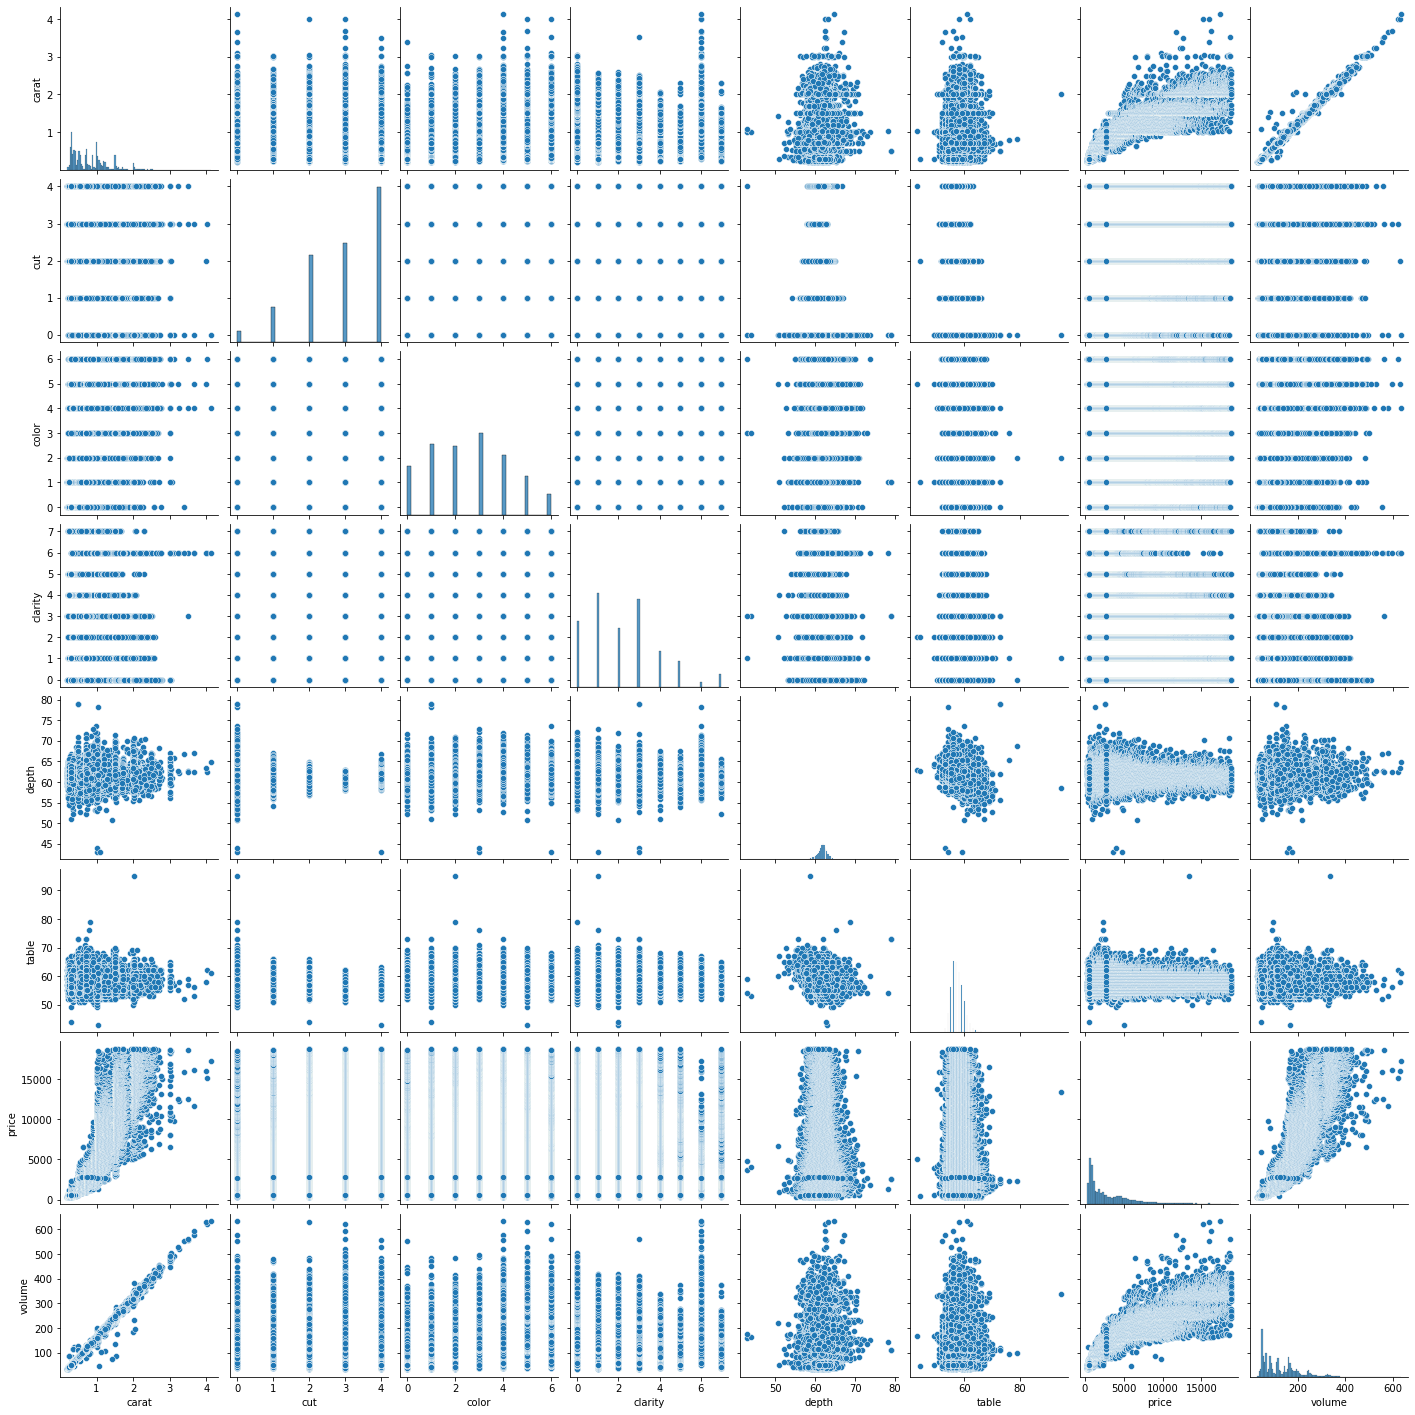

In [77]:
sns.pairplot(data= df)

Splitting the dataset into the Training set and Test set

In [43]:
X = df.drop(['price'],axis=1)
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,4.0,1.0,0.0,61.5,55.0,38.202030
1,0.21,3.0,1.0,1.0,59.8,61.0,34.505856
2,0.23,1.0,1.0,2.0,56.9,65.0,38.076885
3,0.29,3.0,5.0,3.0,62.4,58.0,46.724580
4,0.31,1.0,6.0,0.0,63.3,58.0,51.917250


In [80]:
y = df['price']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

Training the Linear Regression, Tree Regressor and Random Forest regressor Model & Evaluation of the results.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [48]:
from sklearn import metrics

In [49]:
#create a list of the models I want to use
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
print(models)

[LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]


In [50]:
# Creating a new DataFrame which consists of the True values
# and the predicted values of each of the models

new_df = pd.DataFrame({'True_Values': y_test})

for i in models:
  
  i.fit(X_train, y_train)
  new_df[f'pred_{i}'] = i.predict(X_test)

  #Print the R-squared value for each model
  print(f'\n The accuracy of {i} is : {i.score(X_test,y_test)}')

  #Print the result of the Mean squared error (MSE)
  print(f'MSE of {i} is : {metrics.mean_squared_error(y_test,i.predict(X_test))}')

  #Print the result of hte Root mean squared error (RMSE)
  print(f'RMSE of {i} is : {np.sqrt(metrics.mean_squared_error(y_test,i.predict(X_test)))}')

  #Print result of the Mean absolute error (MAE)
  print(f'MAE of {i} is : {metrics.mean_absolute_error(y_test,i.predict(X_test))}')
   


 The accuracy of LinearRegression() is : 0.8853767860356166
MSE of LinearRegression() is : 1787473.8913642985
RMSE of LinearRegression() is : 1336.9644316002946
MAE of LinearRegression() is : 869.3847116520196

 The accuracy of DecisionTreeRegressor() is : 0.9665292408210209
MSE of DecisionTreeRegressor() is : 521954.55080466875
RMSE of DecisionTreeRegressor() is : 722.4642211242497
MAE of DecisionTreeRegressor() is : 356.49618742505993

 The accuracy of RandomForestRegressor() is : 0.9813537837462276
MSE of RandomForestRegressor() is : 290775.5207135202
RMSE of RandomForestRegressor() is : 539.2360528687972
MAE of RandomForestRegressor() is : 276.701861858626


In [51]:
new_df.head()

,True_Values,pred_LinearRegression(),pred_DecisionTreeRegressor(),pred_RandomForestRegressor()
35813,914,1680.037661,914.0,916.230
3521,3405,3887.742910,2907.0,2909.260
42347,1299,502.487251,990.0,972.246
25602,14456,11832.458049,16643.0,15926.540
9153,4540,5231.824910,6264.0,5242.760


Visualization of the result of each model.

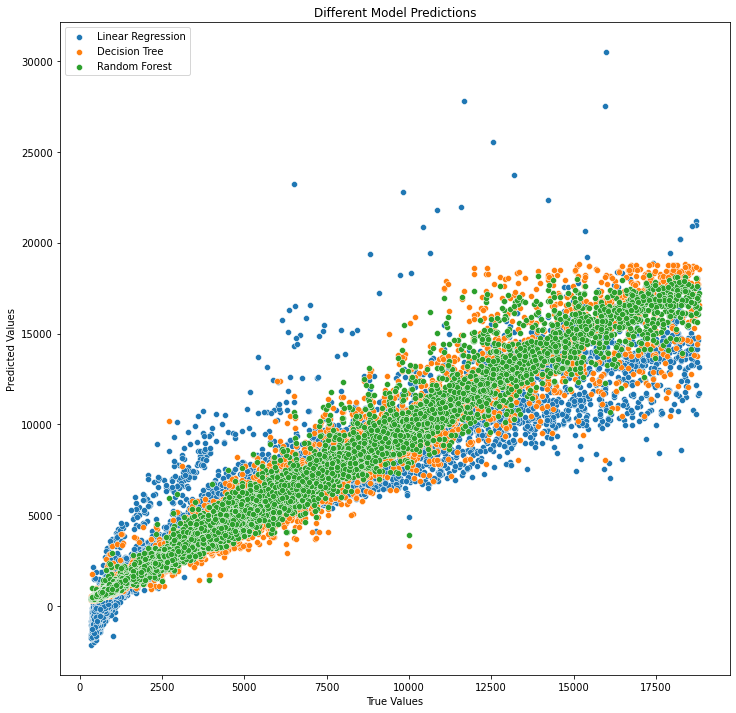

In [52]:
plt.figure(figsize=(12,12))

sns.scatterplot(data=new_df,x='True_Values',y='pred_LinearRegression()',label='Linear Regression')
sns.scatterplot(data=new_df,x='True_Values',y='pred_DecisionTreeRegressor()', label='Decision Tree')
sns.scatterplot(data=new_df,x='True_Values',y='pred_RandomForestRegressor()',label='Random Forest')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Different Model Predictions')
plt.legend()

In this project I want to predict Diamond Prices based on Cut, Color, Clurity and other attributes. I have chosen the simple structure diamonds dataset from the Kaggle website.

DataSet: The dataset consists of 53,940 entries of diamonds and contains 11 columns (10 of them are features and 1 is the target value.)

Main features: Index counter (Specific index of record)
               carat   (Weight of the diamond)
               cut     (Quality of the diamond, which onsists of fair, good,very good,premium,ideal)
               color   (Color of the diamond)
               clarity (How clear the diamond is)
               price   (Price of the diamond)
               table   (width of top of diamond relative to widest point)
               x       (Length in mm)
               y       (Width in mm)
               z       (depth in mm)
               depth   (total depth percentage = z / mean(x, y)) 



The dataset does not include any missing values. However diamonds with x,y,z=0 or x,y,z >10 are outliers.

The dataset includes 3 categorical variable(cut,color and clarity). I used OrdinalEncoder to encode these categorical vairables.

I created a new feature called "volume", which is the multiplication of x, y and z. I removed the x,y,z columns and added a this new "volume" column to the dataset.

I split the dataset into train and test set. I used tree different models (Linear Regression, Decision Tree Regressor and Random Forest Regressor) to train the dataset.

*   The linear regression model was able to predict the price of every diamond in the test set with an error of 869.38 of the real price.

*  The Decision Tree Regressor model was able to predict the price of every diamond in the test set with an error of 354 of the real price.

*  The Random Forest Regressor model was able to predict the price of every diamond in the test set with an error of 277

The best model was the Random Forest Regressor with accuracy score: 0.98




                      